Importing Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Importing Files

In [4]:
files = {"Data_of_Attack_Back_Normal.csv": "Normal",
    "Data_of_Attack_Back.csv": "Back",
    "Data_of_Attack_Back_BufferOverflow.csv": "BufferOverflow",
    "Data_of_Attack_Back_FTPWrite.csv": "FTPWrite",
    "Data_of_Attack_Back_GuessPassword.csv": "GuessPassword",
    "Data_of_Attack_Back_Neptune.csv": "Neptune",
    "Data_of_Attack_Back_NMap.csv": "NMap",
    "Data_of_Attack_Back_PortSweep.csv": "PortSweep",
    "Data_of_Attack_Back_RootKit.csv": "RootKit",
    "Data_of_Attack_Back_Satan.csv": "Satan",
    "Data_of_Attack_Back_Smurf.csv": "Smurf"}

In [5]:
dataframes = []

In [6]:
path = "C://MACHINE LEARNING//PROJECT//12. Capstone Case Study - Cyber Security Case Study//"

In [7]:
for file_name, attack_type in files.items():
    
    df = pd.read_csv(path + file_name)
    
    df['attack'] = attack_type
    dataframes.append(df)

In [8]:
attack_data = pd.concat(dataframes, ignore_index=True)

In [9]:
attack_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Prepration

In [16]:
attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817550 entries, 0 to 817549
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817543 non-null  float64
 1    protocol_type                817543 non-null  float64
 2    service                      817543 non-null  float64
 3    flag                         817543 non-null  float64
 4    src_bytes                    817543 non-null  float64
 5    dst_bytes                    817543 non-null  float64
 6    land                         817543 non-null  float64
 7    wrong_fragment               817543 non-null  float64
 8    urgent                       817543 non-null  float64
 9    hot                          817543 non-null  float64
 10   num_failed_logins            817543 non-null  float64
 11   logged_in                    817543 non-null  float64
 12   num_compromised              817543 non-nul

In [15]:
attack_data.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack', '0.0026', ' 0', ' 0.07', ' 0.3',
       ' 0.00116', ' 0.00451', ' 0.4', ' 0.5', ' 0.6', ' 0.2', ' 0.7', ' 0.1',
       ' 0.8', ' 0.9

In [18]:
attack_data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,817543.0,0.000877,0.026636,0.0,0.0,0.00000,0.00000,1.00
protocol_type,817543.0,0.000570,0.002596,0.0,0.0,0.00000,0.00000,0.02
service,817543.0,0.052908,0.096388,0.0,0.0,0.00000,0.12000,0.67
flag,817543.0,0.020160,0.030960,0.0,0.0,0.00000,0.07000,0.10
src_bytes,817543.0,0.004961,0.033235,0.0,0.0,0.00217,0.00299,1.00
...,...,...,...,...,...,...,...,...
0.22,7.0,0.013429,0.021778,0.0,0.0,0.00200,0.02100,0.05
0.23,7.0,0.000000,0.000000,0.0,0.0,0.00000,0.00000,0.00
0.24,7.0,0.000000,0.000000,0.0,0.0,0.00000,0.00000,0.00
0.25,7.0,0.000000,0.000000,0.0,0.0,0.00000,0.00000,0.00


In [19]:
attack_data.shape

(817550, 83)

In [20]:
attack_data[['attack']]

,attack
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
817545,Smurf
817546,Smurf
817547,Smurf
817548,Smurf


In [10]:
## dropping columns
attack_data = attack_data.drop(columns = attack_data.columns[42:83])

In [11]:
attack_data.isnull().sum()

duration                        7
 protocol_type                  7
 service                        7
 flag                           7
 src_bytes                      7
 dst_bytes                      7
 land                           7
 wrong_fragment                 7
 urgent                         7
 hot                            7
 num_failed_logins              7
 logged_in                      7
 num_compromised                7
 root_shell                     7
 su_attempted                   7
 num_root                       7
 num_file_creations             7
 num_shells                     7
 num_access_files               7
 num_outbound_cmds              7
 is_host_login                  7
 is_guest_login                 7
 count                          7
 srv_count                      7
 serror_rate                    7
 srv_error_rate                 7
 rerror_rate                    7
 srv_rerror_rate                7
 same_srv_rate                  7
 diff_srv_rate

In [12]:
attack_data = attack_data.dropna()

In [13]:
attack_data.isnull().sum()

duration                        0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_error_rate                 0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

In [14]:
attack_data.columns = attack_data.columns.str.strip()

In [29]:
attack_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [15]:
attack_data["attack"].unique()

array(['Normal', 'Back', 'BufferOverflow', 'GuessPassword', 'Neptune',
       'NMap', 'PortSweep', 'RootKit', 'Satan', 'Smurf'], dtype=object)

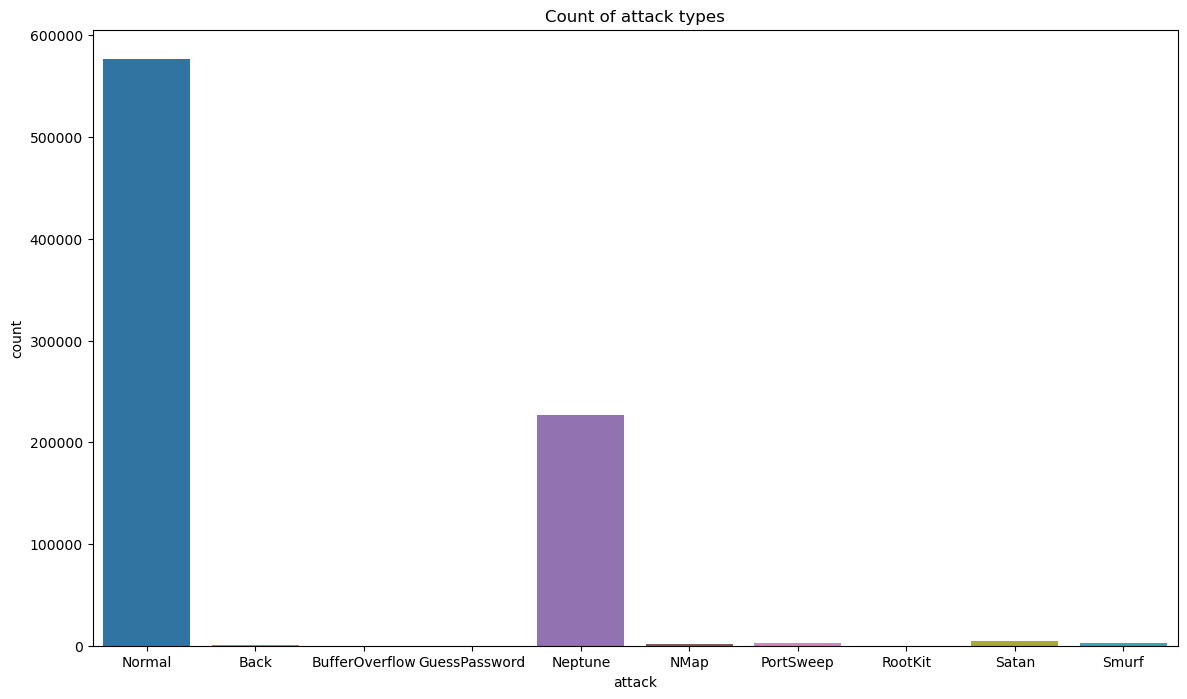

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(x = 'attack', data = attack_data)
plt.title("Count of attack types")
plt.show()

In [17]:
attack_data['flag'].unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 , 0.09])

In [18]:
threshold = 0.05
attack_data['flag'] = attack_data['flag'].apply(lambda x: 0 if x < threshold else 1)

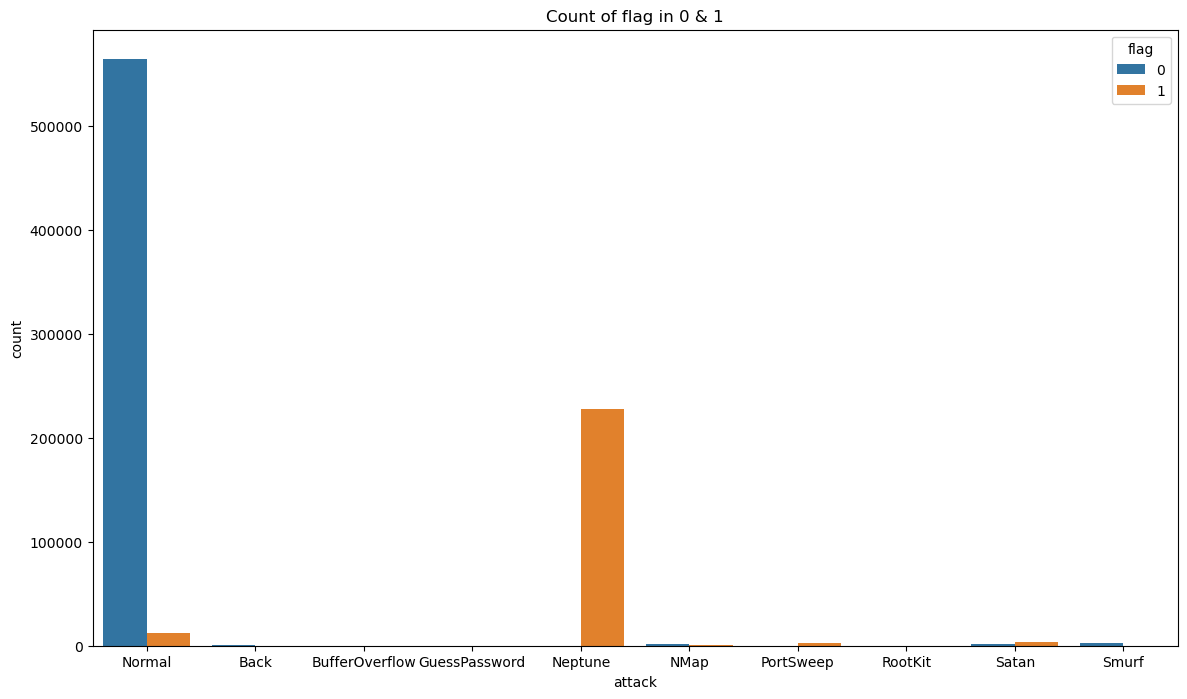

In [19]:
plt.figure(figsize=(14,8))
sns.countplot(x='attack', hue='flag', data = attack_data)
plt.title('Count of flag in 0 & 1')
plt.show()

In [20]:
attack_data_cont = attack_data.drop(columns=['attack'])

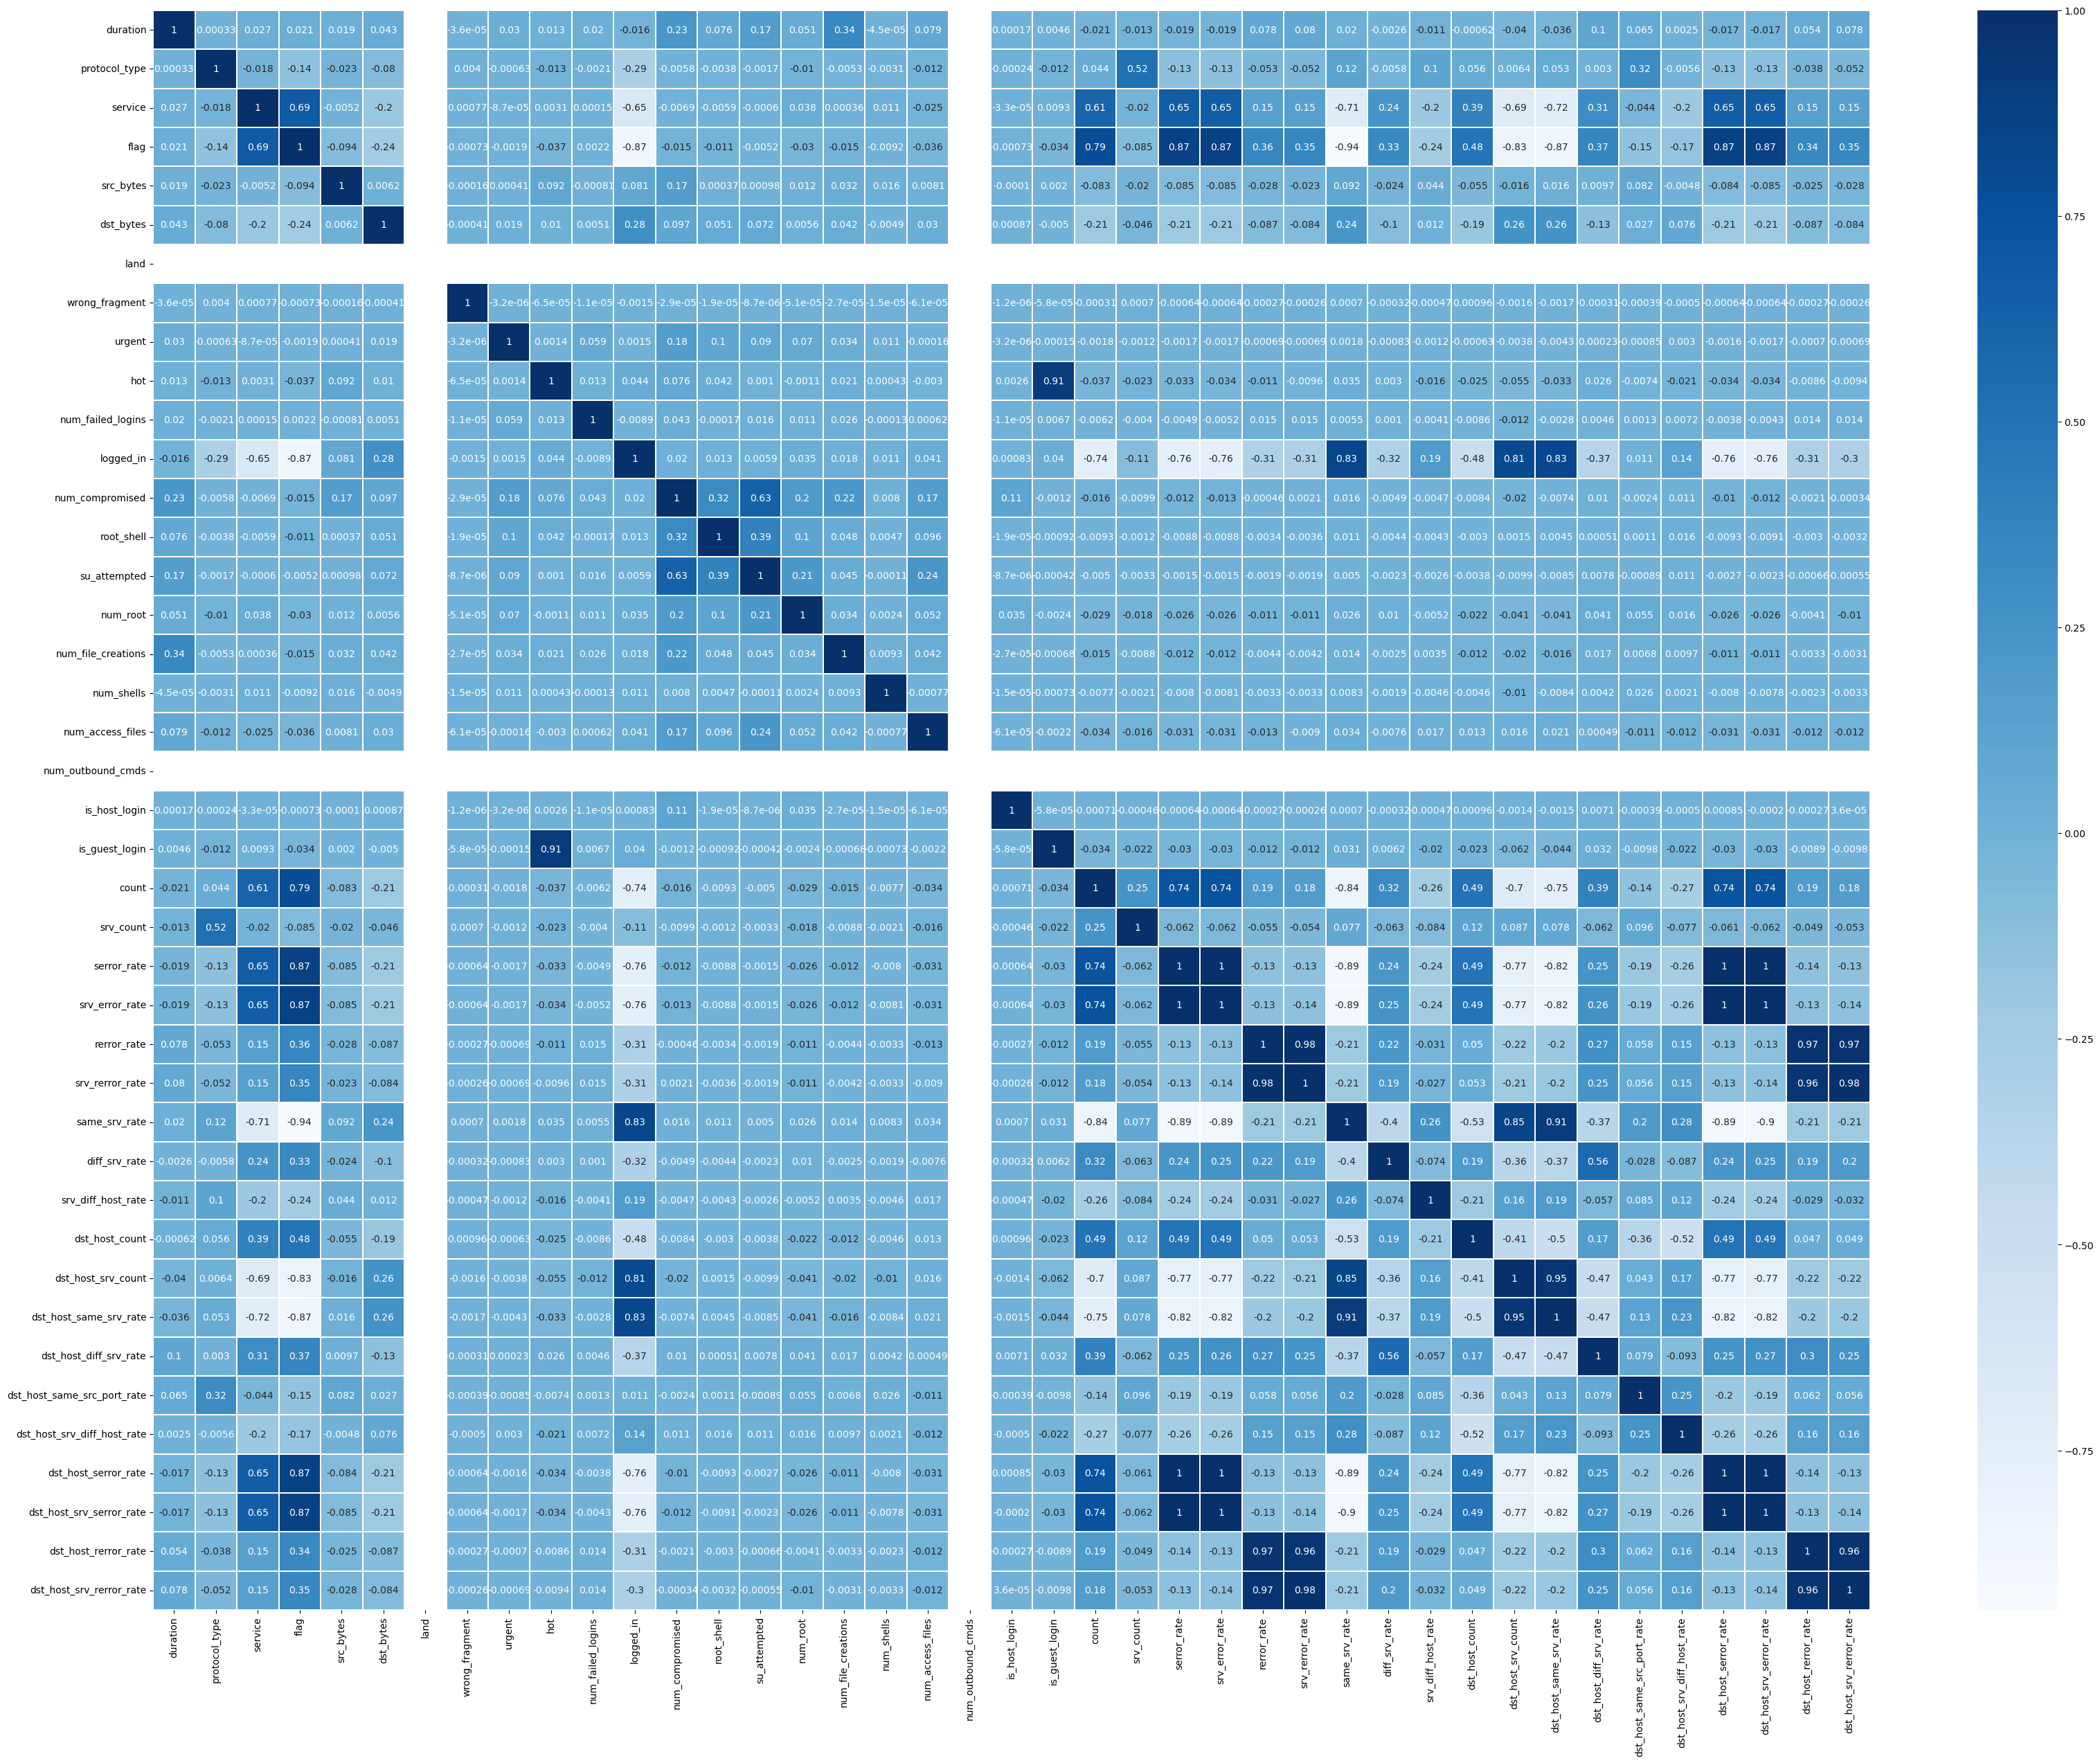

In [21]:
plt.figure(figsize=(40,30))
sns.heatmap(attack_data_cont.corr(),cmap='Blues', annot= True, linewidths=0.1)
plt.show()

## Binomial Classification

Initiate

In [22]:
attack_data['attack_binary'] = attack_data['attack'].apply(lambda x: 0 if x == 'Normal' else 1)

In [23]:
attack_data['attack_binary'].unique()

array([0, 1], dtype=int64)

Train Test Split

In [27]:
X = attack_data.drop(columns = ['attack','attack_binary'])
y = attack_data['attack_binary']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(654034, 41)
(163509, 41)
(654034,)
(163509,)


##### Logistic Regression

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [44]:
model = LogisticRegression()

In [45]:
# Train the model
model.fit(X_train, y_train)

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9976698530356127
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115172
           1       1.00      1.00      1.00     48337

    accuracy                           1.00    163509
   macro avg       1.00      1.00      1.00    163509
weighted avg       1.00      1.00      1.00    163509

Confusion Matrix:
 [[114993    179]
 [   202  48135]]


In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[114993,    179],
       [   202,  48135]], dtype=int64)

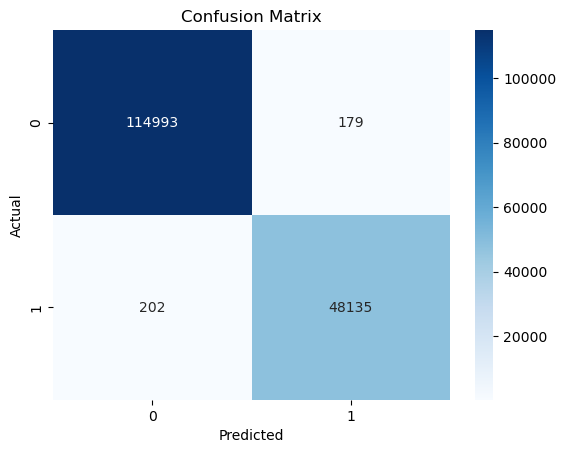

In [53]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Random Forest

In [62]:
model = RandomForestClassifier()

In [63]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9999143778018336
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115172
           1       1.00      1.00      1.00     48337

    accuracy                           1.00    163509
   macro avg       1.00      1.00      1.00    163509
weighted avg       1.00      1.00      1.00    163509

Confusion Matrix:
 [[115169      3]
 [    11  48326]]


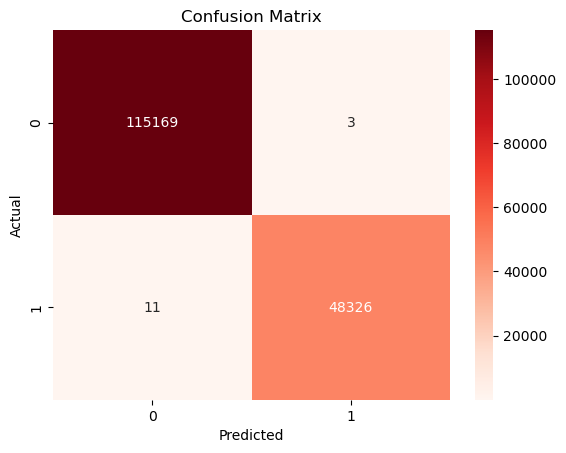

In [66]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Support Vector Machine(SVM)

In [67]:
model = SVC()

In [68]:
model.fit(X_train, y_train)

SVC()

In [69]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9999143778018336
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    115172
           1       1.00      1.00      1.00     48337

    accuracy                           1.00    163509
   macro avg       1.00      1.00      1.00    163509
weighted avg       1.00      1.00      1.00    163509

Confusion Matrix:
 [[115169      3]
 [    11  48326]]


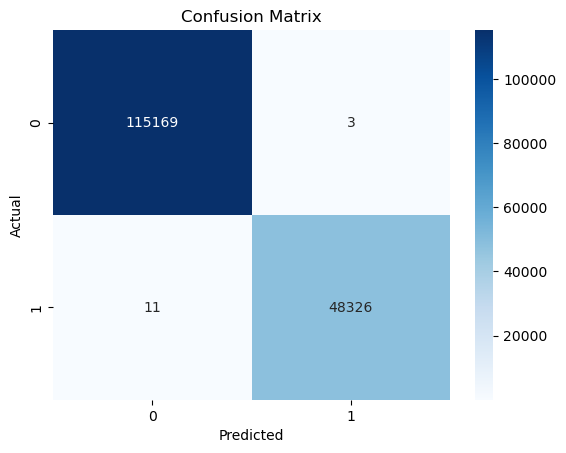

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

For Binomial Classification we can see that both Random forest and Support vector machine did a good job silghtly compare to Logestic Regression.

## Multinomial Classification

Initiate

In [76]:
attack_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack',
       'attack_binary'],
      dtype='object')

In [77]:
attack_data = attack_data.drop(columns = "attack_binary")

In [80]:
## Label Encoder
label = LabelEncoder()

In [81]:
attack_data['attack_encoded'] = label.fit_transform(attack_data['attack'])

In [82]:
attack_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_encoded
0,0.0,0.0,0.0,0,0.00215,0.45076,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,Normal,5
1,0.0,0.0,0.0,0,0.00162,0.04528,0.0,0.0,0.0,0.0,...,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Normal,5
2,0.0,0.0,0.0,0,0.00236,0.01228,0.0,0.0,0.0,0.0,...,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Normal,5
3,0.0,0.0,0.0,0,0.00233,0.02032,0.0,0.0,0.0,0.0,...,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Normal,5
4,0.0,0.0,0.0,0,0.00239,0.00486,0.0,0.0,0.0,0.0,...,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,Normal,5


In [83]:
attack_data["attack_encoded"].unique()

array([5, 0, 1, 2, 4, 3, 6, 7, 8, 9])

Train - Test Split

In [84]:
X = attack_data.drop(columns=['attack','attack_encoded'])
y = attack_data['attack_encoded']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# Standard Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Logiestic Regression

In [98]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [99]:
## Train model
model.fit(X_train, y_train)

C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [100]:
y_pred = model.predict(X_test)

In [101]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9960858423695331


In [102]:
print("Classification Report: ", classification_report(y_test, y_pred, target_names=label.classes_))

Classification Report:                  precision    recall  f1-score   support

          Back       0.84      0.95      0.89       180
BufferOverflow       0.00      0.00      0.00         4
 GuessPassword       0.00      0.00      0.00         6
          NMap       0.90      0.34      0.50       297
       Neptune       1.00      1.00      1.00     45606
        Normal       1.00      1.00      1.00    115172
     PortSweep       0.87      0.78      0.82       599
       RootKit       0.00      0.00      0.00         1
         Satan       0.97      0.88      0.92      1005
         Smurf       0.94      0.84      0.89       639

      accuracy                           1.00    163509
     macro avg       0.65      0.58      0.60    163509
  weighted avg       1.00      1.00      1.00    163509



C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

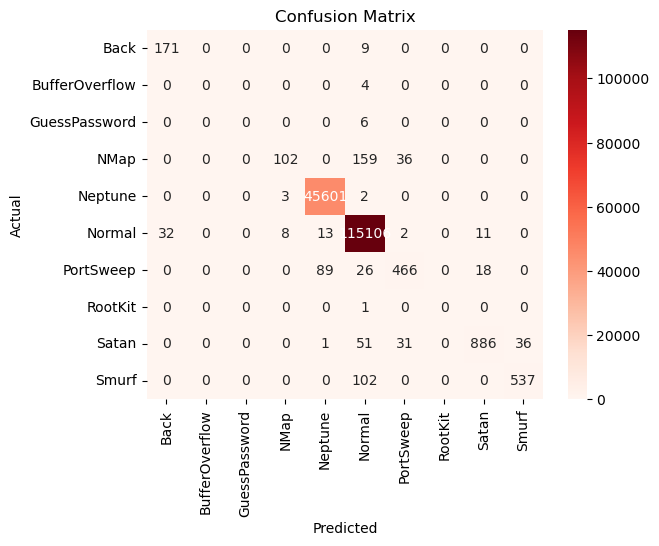

In [111]:
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Reds', xticklabels=label.classes_, yticklabels=label.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Random forest

In [86]:
model = RandomForestClassifier()

In [88]:
## train model

model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_pred = model.predict(X_test)

In [90]:
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9998593349601551


In [91]:
print("Classifiction Report:\n", classification_report(y_test, y_pred, target_names=label.classes_))

Classifiction Report:
                 precision    recall  f1-score   support

          Back       1.00      1.00      1.00       180
BufferOverflow       1.00      1.00      1.00         4
 GuessPassword       1.00      1.00      1.00         6
          NMap       1.00      1.00      1.00       297
       Neptune       1.00      1.00      1.00     45606
        Normal       1.00      1.00      1.00    115172
     PortSweep       0.99      0.98      0.99       599
       RootKit       0.00      0.00      0.00         1
         Satan       1.00      0.99      0.99      1005
         Smurf       1.00      1.00      1.00       639

      accuracy                           1.00    163509
     macro avg       0.90      0.90      0.90    163509
  weighted avg       1.00      1.00      1.00    163509



C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

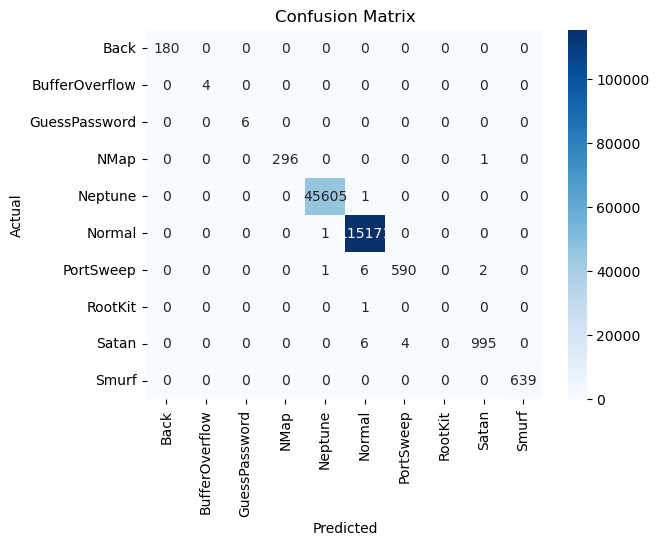

In [97]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label.classes_, yticklabels=label.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Support vector machine

In [113]:
model = SVC(decision_function_shape='ovo')

In [114]:
# Train the model
model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [116]:
y_pred = model.predict(X_test)

In [117]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.9990520399488713


In [118]:
print("Classification Report: ",classification_report(y_test,y_pred,target_names=label.classes_))

Classification Report:                  precision    recall  f1-score   support

          Back       1.00      0.99      0.99       180
BufferOverflow       1.00      0.50      0.67         4
 GuessPassword       1.00      1.00      1.00         6
          NMap       1.00      0.82      0.90       297
       Neptune       1.00      1.00      1.00     45606
        Normal       1.00      1.00      1.00    115172
     PortSweep       0.97      0.97      0.97       599
       RootKit       0.00      0.00      0.00         1
         Satan       0.99      0.96      0.98      1005
         Smurf       1.00      0.96      0.98       639

      accuracy                           1.00    163509
     macro avg       0.89      0.82      0.85    163509
  weighted avg       1.00      1.00      1.00    163509



C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

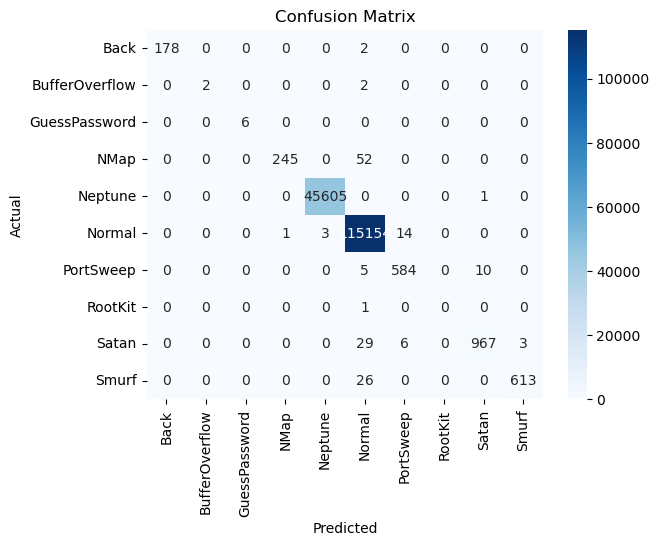

In [122]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=label.classes_,yticklabels=label.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()